### CNN Model on fer2013 (Face Images Dataset)

---

**Problem Statement**

- The data consists of 48x48 pixel grayscale images of faces. 
- The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image. 
- The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories
    - 0 = Angry
    - 1 = Disgust
    - 2 = Fear
    - 3 = Happy
    - 4 = Sad
    - 5 = Surprise
    - 6 = Neutral


**Dataset** 
- Download [Dataset-Fer2013.csv](https://www.dropbox.com/s/n8bninud94blch4/fer2013.csv)
- The dataset consists of 28,709 examples.
- `Fer2013.csv` - Two columns -- "emotion" and "pixels". 
- The `emotion` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. 
- The `pixels` column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order.
- This dataset was prepared by Pierre-Luc Carrier and Aaron Courville, as part of an ongoing research project.

---

**Question 1** - Reshape and Normalize the data
- Hint
  - Split pixels by space to get columns
  - reshape the input image
      - 48, 48 ,1
  - change the type of data to float32

---

**Question 2** - Normalize & Train_Test Split
- Hint
    - Normalize the data by dividing with 255
    - Split data into train and test (90,10)
    - Initiate the training
       
---

**Question 3** - Define CNN Model:
   - Layer 1
       - 2 Conv2d with 64 filters of 5,5 filter
       - BatchNormalization layer
       - Max Pooling layer with 2,2
       - Activation relu
   - Layer 2
       - 2 Conv2d with 128 filters of 5,5 filter
       - BatchNormalization layer
       - Max Pooling layer with 2,2
       - Activation relu
   - Layer 3
       - 2 Conv2d with 256 filters of 3,3 filter
       - BatchNormalization layer
       - Max Pooling layer with 2,2
       - Activation relu
   - Layer 4
       - Flatten layer
       - Dense Layer with 128 Neuron
       - BatchNormalization
       - Activation Relu
       - Dropout 0.25
       - Dense 7 neurons with Softmax
   - Loss: Categorical cross-entropy
   - Optimizer: Adam

|          **Layer (type)**     |        **Output Shape**    |**Param #** |
|:-----------------------------:|:--------------------------:|:-------:|
|       conv2d_1 (Conv2D)       |     (None, 48, 48, 64)     |   1664  |
|       conv2d_2 (Conv2D)       |     (None, 48, 48, 64)     |  102464 |
| batch_normalization_1 (Batch) |     (None, 48, 48, 64)     |   256   |
| max_pooling2d_1 (MaxPooling2) |     (None, 24, 24, 64)     |    0    |
|       conv2d_3 (Conv2D)       |     (None, 24, 24, 128)    |  204928 |
|       conv2d_4 (Conv2D)       |     (None, 24, 24, 128)    |  409728 |
| batch_normalization_2 (Batch) |     (None, 24, 24, 128)    |   512   |
| max_pooling2d_2 (MaxPooling2) |     (None, 12, 12, 128)    |    0    |
|       conv2d_5 (Conv2D)       |     (None, 12, 12, 256)    |  295168 |
|       conv2d_6 (Conv2D)       |     (None, 12, 12, 256)    |  590080 |
|     batch_normalization_3     | (Batch (None, 12, 12, 256) |   1024  |
| max_pooling2d_3 (MaxPooling2) |      (None, 6, 6, 256)     |    0    |
|      flatten_1 (Flatten)      |        (None, 9216)        |    0    |
|        dense_1 (Dense)        |         (None, 128)        | 1179776 |
|     batch_normalization_4     |     (Batch (None, 128)     |   512   |
|   activation_1 (Activation)   |         (None, 128)        |    0    |
|      dropout_1 (Dropout)      |         (None, 128)        |    0    |
|        dense_2 (Dense)        |          (None, 7)         |   903   |
|   activation_2 (Activation)   |          (None, 7)         |    0    |


Total params: 2,787,015 <br>
Trainable params: 2,785,863 <br>
Non-trainable params: 1,152

---

**Question 4** - Fit CNN Model:
- Hint
  - Epoch = 20
  - Batch_size = 64
  - Lr = 1e-3 (0.001)
        
---

**Question 5** - Draw confusion matrix for the trained model.
- Hint
  - Use model.predict_classes
  - Use np.argmax(y_test,axis=1)

---

**Question 6** - Save the model to external .h5 File

---

**Question 7** - Convert the saved model to .pb model
- Hint
  - Use the free_session function to convert
  - Create keras session: sess = K.get_session()
  - Use tf.train.write_graph to convert frozen graph as .pb

### Selecting Tensorflow v1 -- Applicable only for Google Colab

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


### Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Downloading the Dataset from Dropbox to local Google Drive

In [0]:
# Using wget, downloading file to Google Drive Path
# !wget https://www.dropbox.com/s/n8bninud94blch4/fer2013.csv -P "/content/drive/My Drive/Colab Notebooks/Dataset"

### Importing Modules

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


#### # Importing the dataset into DataFrame

In [5]:
data = pd.read_csv(
    '/content/drive/My Drive/Colab Notebooks/Dataset/fer2013.csv')

data.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


#### Mapping emotion categorical values to the facial expression classes

In [0]:
emotion_map = {0: 'Angry', 
               1: 'Digust', 
               2: 'Fear',
               3: 'Happy', 
               4: 'Sad', 
               5: 'Surprise', 
               6: 'Neutral'
              }

#### Generating counts of uniques values for emotion classes

In [7]:
emotion_counts = data['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Digust,547
2,Fear,5121
3,Happy,8989
4,Sad,6077
5,Surprise,4002
6,Neutral,6198


#### Bar graph of the class distributions

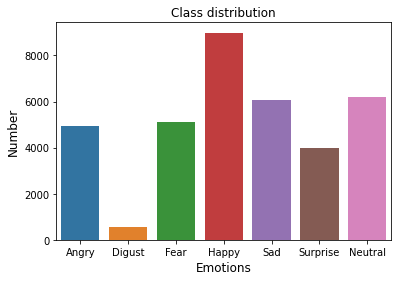

In [8]:
plt.figure(figsize=(6,4))
sns.barplot(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

#### Split data into Training, Validation and Test set

In [9]:
data_train = data[data['Usage'] == 'Training'].copy()
data_val = data[data['Usage'] == 'PublicTest'].copy()
data_test = data[data['Usage'] == 'PrivateTest'].copy()

print('Train data shape: {}, \n Validation data shape: {}, \nTest data shape: {}'.format(
    data_train.shape, data_val.shape, data_test.shape))

Train data shape: (28709, 3), 
 Validation data shape: (3589, 3), 
Test data shape: (3589, 3)


#### Hyper-parameters

In [0]:
num_classes = 7 
width, height = 48, 48
num_epochs = 20
batch_size = 64
num_features = 64

#### CRNO stands for Convert, Reshape, Normalize, One-hot encoding
- (i) convert strings to lists of integers
- (ii) reshape and normalise grayscale image with 255.0
- (iii) one-hot encoding label

In [12]:
def CRNO(df, dataName):
    df['pixels'] = df['pixels'].apply(lambda pixel_sequence: [int(pixel) for pixel in pixel_sequence.split()])
    data_X = np.array(df['pixels'].tolist(), dtype='float32').reshape(-1,width, height,1)/255.0   
    data_Y = to_categorical(df['emotion'], num_classes)  
    print(dataName, '_X shape: {}, ', dataName, '_Y shape: {}'.format(data_X.shape, data_Y.shape))
    return data_X, data_Y

# training data    
train_X, train_Y = CRNO(data_train, 'Train') 

# validation data
val_X, val_Y     = CRNO(data_val, 'Validation') 

# test data
test_X, test_Y   = CRNO(data_test, 'Test') 

Train _X shape: {},  Train _Y shape: (28709, 48, 48, 1)
Validation _X shape: {},  Validation _Y shape: (3589, 48, 48, 1)
Test _X shape: {},  Test _Y shape: (3589, 48, 48, 1)


## Building CNN Model

#### Creating the layers

In [13]:
model = Sequential()

# module 1 - filter = num_features = 64
model.add(Conv2D(num_features, kernel_size=(
    5, 5), input_shape=(width, height, 1)))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(num_features, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# module 2 - filter = 2*num_features = 128
model.add(Conv2D(2*num_features, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*num_features, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# module 3 - filter = 2*2*num_features = 256
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# flatten
model.add(Flatten())

#dense 1
model.add(Dense(2*2*2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

#dense 2
model.add(Dense(2*2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

#dense 3
model.add(Dense(2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

#output layer
model.add(Dense(num_classes, activation='softmax'))

#### Model Compliation

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, 
                             beta_1=0.9, 
                             beta_2=0.999, 
                             epsilon=1e-7),
              metrics=['accuracy'])

In [15]:
%%time
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        102464    
_________________________________________________________________
batch_normalization_2 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 44, 44, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)       

In [0]:
# data generator
data_generator = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    horizontal_flip=True)

In [0]:
# early stopping to avoid overfitting
es = EarlyStopping(monitor='val_loss', patience=10,
                   mode='min', restore_best_weights=True)

In [18]:
%%time
history = model.fit_generator(data_generator.flow(train_X, train_Y, batch_size),
                              steps_per_epoch=len(train_X) / batch_size,
                              epochs=num_epochs,
                              verbose=2,
                              callbacks=[es],
                              validation_data=(val_X, val_Y))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
 - 20s - loss: 1.6720 - acc: 0.3423 - val_loss: 1.5244 - val_acc: 0.3943
Epoch 2/20
 - 16s - loss: 1.3860 - acc: 0.4637 - val_loss: 1.4150 - val_acc: 0.4581
Epoch 3/20
 - 16s - loss: 1.2440 - acc: 0.5262 - val_loss: 1.4006 - val_acc: 0.4865
Epoch 4/20
 - 16s - loss: 1.1703 - acc: 0.5565 - val_loss: 1.3274 - val_acc: 0.5104
Epoch 5/20
 - 16s - loss: 1.1254 - acc: 0.5702 - val_loss: 1.2662 - val_acc: 0.5252
Epoch 6/20
 - 16s - loss: 1.0831 - acc: 0.5890 - val_loss: 1.1120 - val_acc: 0.5745
Epoch 7/20
 - 16s - loss: 1.0536 - acc: 0.6021 - val_loss: 1.2030 - val_acc: 0.5617
Epoch 8/20
 - 16s - loss: 1.0247 - acc: 0.6129 - val_loss: 1.1676 - val_acc: 0.5659
Epoch 9/20
 - 16s - loss: 0.9972 - acc: 0.6218 - val_loss: 1.0640 - val_acc: 0.5874
Epoch 10/20
 - 16s - loss: 0.9742 - acc: 0.6355 - val_loss: 1.0859 - val_acc: 0.5993
Epoch 11/20
 - 16s - loss: 0.9503 - acc: 0.6429 - val_loss: 1.0

#### Visualize Training Performance

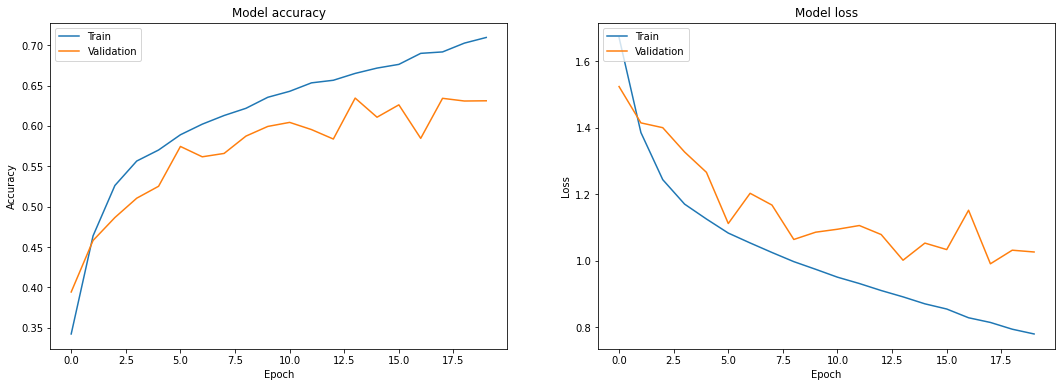

In [19]:
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(history.history['acc'])
axes[0].plot(history.history['val_acc'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Evaluate Test Performance

In [20]:
test_true = np.argmax(test_Y, axis=1)
test_pred = np.argmax(model.predict(test_X), axis=1)

print('CNN Model Accuracy on test set: {:.4f}'.format(
    accuracy_score(test_true, test_pred)))

CNN Model Accuracy on test set: 0.6369


#### Analysis using Confusion Matrix
- Confusion Matrix is applied and plotted to find out which emotion usually get confused with each other.

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.PuRd):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix, Without Normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots(figsize=(16, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True Labels',
           xlabel='Predicted Labels')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

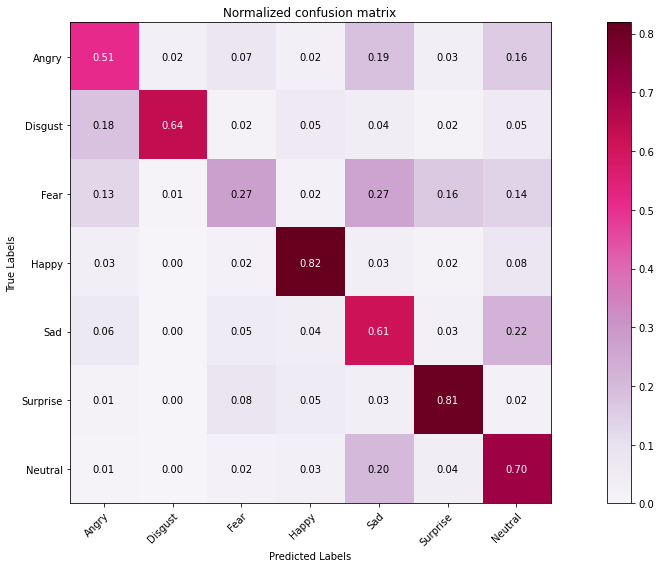

In [22]:
# Plot normalized confusion matrix
plot_confusion_matrix(test_true, test_pred, classes=emotion_labels,
                      normalize=True, title='Normalized confusion matrix')

plt.show()

#### Saving the Model in Google Drive

In [23]:
from keras.models import model_from_json

model_json = model.to_json()

with open('/content/drive/My Drive/Colab Notebooks/Fer2013 Models/fer2013model.json', 'w') as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
model.save_weights(
    '/content/drive/My Drive/Colab Notebooks/Fer2013 Models/fer2013model.h5')

print('Saved model to disk')

Saved model to disk


#### Converting the model to .pb file

In [0]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    
    with graph.as_default():
        
        freeze_var_names = list(
            set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph

In [25]:
# Save Keras model as Tensorflow pb file
from keras import backend as K

# Create, compile and train model...
frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])

tf.train.write_graph(frozen_graph, '/content/drive/My Drive/Colab Notebooks/Fer2013 Models/', 'fer2013model.pb', 
                     as_text=False)

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 211 variables.
INFO:tensorflow:Converted 211 variables to const ops.


'/content/drive/My Drive/Colab Notebooks/Fer2013 Models/fer2013model.pb'